In [25]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression,Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

In [26]:
# Read in full data for movie analysis
df = pd.read_csv('data_for_analysis.csv',index_col=[0])

# Display full column width (for the links) and all the columns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

df.sample(50)

,Tomatoes URL,Title,Tomatometer,Year,N_Tomatometer,tconst,isAdult,runtimeMinutes,Average_Audience_Rating,Number_Audience_Votes,BOM url,Domestic_Gross,International_Gross,Worldwide_Gross,Domestic_Distributor,Domestic_Opening,MPAA_Rating,Genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,G,NC-17,PG,PG-13,R,Unrated
555,https://www.rottentomatoes.com/m/cog,C.O.G.,69,2013,36,tt1650393,0,88.0,5.6,3713,https://www.boxofficemojo.com/title/tt1650393/,55301.0,NaN,55301.0,Screen Media FilmsSee full company information\n\n,32677.0,R,"Comedy,Drama",0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1393,https://www.rottentomatoes.com/m/heartbreak_ridge,Heartbreak Ridge,68,1986,28,tt0091187,0,130.0,6.9,42316,https://www.boxofficemojo.com/title/tt0091187/,42724017.0,NaN,42724017.0,Warner Bros.See full company information\n\n,8100840.0,Unrated,"Drama,War",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
590,https://www.rottentomatoes.com/m/barry_munday,Barry Munday,47,2010,15,tt0482461,0,95.0,5.8,4182,https://www.boxofficemojo.com/title/tt0482461/,NaN,NaN,NaN,Magnolia PicturesSee full company information\n\n,NaN,R,"Comedy,Drama,Romance",0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
13,https://www.rottentomatoes.com/m/falling_for_figaro,Falling for Figaro,70,2020,20,tt7392014,0,104.0,6.2,959,https://www.boxofficemojo.com/title/tt7392014/,35910.0,140437.0,176347.0,IFC FilmsSee full company information\n\n,14335.0,Unrated,"Comedy,Romance",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
818,https://www.rottentomatoes.com/m/haunted_mansion,The Haunted Mansion,13,2003,141,tt0338094,0,99.0,5.1,47352,https://www.boxofficemojo.com/title/tt0338094/,75847266.0,106443000.0,182290266.0,Walt Disney Studios Motion PicturesSee full company information\n\n,24278410.0,PG,"Comedy,Family,Fantasy,Horror,Mystery",0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
780,https://www.rottentomatoes.com/m/dead_man_on_campus,Dead Man on Campus,15,1998,46,tt0118301,0,96.0,6.0,15427,https://www.boxofficemojo.com/title/tt0118301/,15064946.0,NaN,15064946.0,Paramount PicturesSee full company information\n\n,4704688.0,R,Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15,https://www.rottentomatoes.com/m/little_accidents_2015,Little Accidents,54,2014,39,tt3125220,0,105.0,5.8,3622,https://www.boxofficemojo.com/title/tt3125220/,10071.0,NaN,10071.0,AmplifySee full company information\n\n,8649.0,Unrated,Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
719,https://www.rottentomatoes.com/m/hunky_dory,Hunky Dory,54,2011,46,tt1727300,0,110.0,6.2,1234,https://www.boxofficemojo.com/title/tt1727300/,20296.0,119357.0,139653.0,Variance FilmsSee full company information\n\n,7443.0,Unrated,"Comedy,Drama,Music",0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
591,https://www.rottentomatoes.com/m/tommy_boy,Tommy Boy,42,1995,43,tt0240120,1,NaN,4.5,18,https://www.boxofficemojo.com/title/tt0240120/,NaN,NaN,NaN,NaN,NaN,Unrated,Adult,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
786,https://www.rottentomatoes.com/m/above_the_rim,Above the Rim,53,1994,19,tt0109035,0,96.0,6.6,15023,https://www.boxofficemojo.com/title/tt0109035/,16192320.0,NaN,16192320.0,New Line CinemaSee full company information\n\n,3738800.0,R,"Crime,Drama,Sport,Thriller",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7989 entries, 0 to 988
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tomatoes URL             7989 non-null   object 
 1   Title                    7989 non-null   object 
 2   Tomatometer              7989 non-null   int64  
 3   Year                     7989 non-null   int64  
 4   N_Tomatometer            7989 non-null   int64  
 5   tconst                   7989 non-null   object 
 6   isAdult                  7989 non-null   int64  
 7   runtimeMinutes           7965 non-null   float64
 8   Average_Audience_Rating  7989 non-null   float64
 9   Number_Audience_Votes    7989 non-null   int64  
 10  BOM url                  7989 non-null   object 
 11  Domestic_Gross           5362 non-null   float64
 12  International_Gross      4294 non-null   float64
 13  Worldwide_Gross          6315 non-null   float64
 14  Domestic_Distributor     

In [28]:
# Create category to define if movie has one of the top 5 grossing genres
df['Top_5_Genres'] = (df['Action'] + df['Adventure'] + df['Drama'] + df['Comedy'] + df['Thriller'])/(df['Action'] + df['Adventure'] + df['Drama'] + df['Comedy'] + df['Thriller'])
df['Top_5_Genres'] = df['Top_5_Genres'].fillna(0)
df.sample(10)

,Tomatoes URL,Title,Tomatometer,Year,N_Tomatometer,tconst,isAdult,runtimeMinutes,Average_Audience_Rating,Number_Audience_Votes,BOM url,Domestic_Gross,International_Gross,Worldwide_Gross,Domestic_Distributor,Domestic_Opening,MPAA_Rating,Genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,G,NC-17,PG,PG-13,R,Unrated,Top_5_Genres
1597,https://www.rottentomatoes.com/m/thief_of_hearts,Thief of Hearts,0,1984,6,tt0088256,0,100.0,5.8,1683,https://www.boxofficemojo.com/title/tt0088256/,10435015.0,NaN,10435015.0,Paramount PicturesSee full company information\n\n,3091670.0,Unrated,"Crime,Drama,Thriller",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1.0
197,https://www.rottentomatoes.com/m/the_dish_and_the_spoon_2011,The Dish & the Spoon,62,2011,13,tt1554414,0,92.0,5.8,1239,https://www.boxofficemojo.com/title/tt1554414/,NaN,NaN,NaN,NaN,NaN,R,"Comedy,Drama,Romance",0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.0
1674,https://www.rottentomatoes.com/m/boy_culture,Boy Culture,70,2006,30,tt0433350,0,88.0,6.8,5673,https://www.boxofficemojo.com/title/tt0433350/,220409.0,49180.0,269589.0,TLA ReleasingSee full company information\n\n,27835.0,Unrated,"Drama,Romance",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0
1490,https://www.rottentomatoes.com/m/1110242-collateral_damage,Collateral Damage,19,2002,143,tt0233469,0,108.0,5.5,73932,https://www.boxofficemojo.com/title/tt0233469/,40077257.0,38305176.0,78382433.0,Warner Bros.See full company information\n\n,15058432.0,R,"Action,Drama,Thriller",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0
8,https://www.rottentomatoes.com/m/1010012-house,House,57,1985,14,tt0091223,0,93.0,6.2,25624,https://www.boxofficemojo.com/title/tt0091223/,19444631.0,NaN,19444631.0,New World PicturesSee full company information\n\n,5923972.0,Unrated,"Comedy,Fantasy,Horror",0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
184,https://www.rottentomatoes.com/m/1078022-buddy,Buddy,25,1997,20,tt0118787,0,84.0,4.9,2624,https://www.boxofficemojo.com/title/tt0118787/,10113400.0,NaN,10113400.0,Sony Pictures Entertainment (SPE)See full company information\n\n,3504671.0,PG,"Adventure,Comedy,Drama,Family",0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0
1331,https://www.rottentomatoes.com/m/baby_mama,Baby Mama,63,2008,166,tt0871426,0,99.0,6.0,43967,https://www.boxofficemojo.com/title/tt0871426/,60494212.0,3950501.0,64444713.0,Universal PicturesSee full company information\n\n,17407110.0,PG-13,"Comedy,Romance",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0
928,https://www.rottentomatoes.com/m/10009462-g_force,G-Force,22,2009,127,tt0436339,0,88.0,5.1,45058,https://www.boxofficemojo.com/title/tt0436339/,119436770.0,173381128.0,292817898.0,Walt Disney Studios Motion PicturesSee full company information\n\n,31706934.0,PG,"Action,Adventure,Animation,Comedy,Family,Fantasy,Sci-Fi",1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.0
1705,https://www.rottentomatoes.com/m/rock_star,Rock Star,53,2001,129,tt0202470,0,105.0,6.3,42495,https://www.boxofficemojo.com/title/tt0202470/,17008282.0,2325863.0,19334145.0,Warner Bros.See full company information\n\n,6018636.0,R,"Drama,Music",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0
56,https://www.rottentomatoes.com/m/private_resort,Private Resort,14,1985,7,tt0089839,0,82.0,5.3,8183,https://www.boxofficemojo.com/title/tt0089839/,331816.0,NaN,331816.0,TriStar PicturesSee full company information\n\n,163704.0,Unrated,Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0


In [29]:
# find the number of ones in the column "Top_5_Genres"
print(np.count_nonzero(df["Top_5_Genres"]))

7412


In [30]:
# Create df of movies that have a worldwide gross revenue available
df2 = df[df['Worldwide_Gross'].notna()]

# Trim the database to the last 20 years
df2 = df2[(df2['Year']>=2000)&(df2['Year']<2020)]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4580 entries, 33 to 411
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tomatoes URL             4580 non-null   object 
 1   Title                    4580 non-null   object 
 2   Tomatometer              4580 non-null   int64  
 3   Year                     4580 non-null   int64  
 4   N_Tomatometer            4580 non-null   int64  
 5   tconst                   4580 non-null   object 
 6   isAdult                  4580 non-null   int64  
 7   runtimeMinutes           4579 non-null   float64
 8   Average_Audience_Rating  4580 non-null   float64
 9   Number_Audience_Votes    4580 non-null   int64  
 10  BOM url                  4580 non-null   object 
 11  Domestic_Gross           3724 non-null   float64
 12  International_Gross      3871 non-null   float64
 13  Worldwide_Gross          4580 non-null   float64
 14  Domestic_Distributor    

## Average Worldwide Gross vs Movie Genre
- Hypothesis: movies that are in the top 5 genres do better at the box office

/usr/local/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.005820850792403021


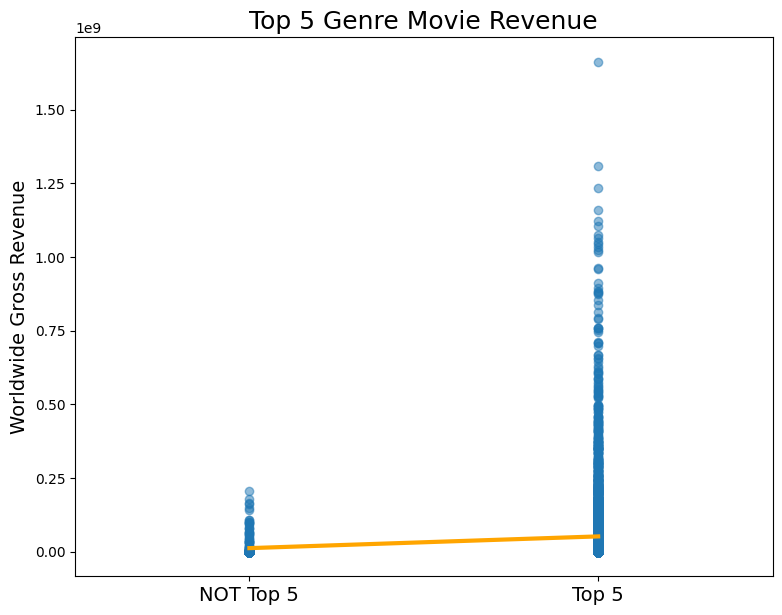

In [31]:
lr = LinearRegression()

x = df2[['Top_5_Genres']]
y = df2['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))

ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

plt.title('Top 5 Genre Movie Revenue', fontsize=18)
plt.ylabel('Worldwide Gross Revenue', fontsize=14)
plt.xlim([-0.5, 1.5])
plt.xticks(np.arange(0, 2, 1))
labels = ['NOT Top 5','Top 5']
ax.set_xticklabels(labels, fontsize=14)

print(lr.score(x, y))


plt.savefig("top_5_revenue.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)





In [32]:
lr.coef_, lr.intercept_
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')
# The average Worldwide Gross is $39 million higher for movies that are in the top 5 genres

slope: 39817265.21
y-intercept: 12382206.25


## Average Worldwide Gross vs MPAA rating / unrated
- Hypothesis: unrated movies tend to do less well in theatres, sometimes they're not even shown. Does the rating (kid friendly vs not) have an impact on its success?


0.028917651581936932


/usr/local/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


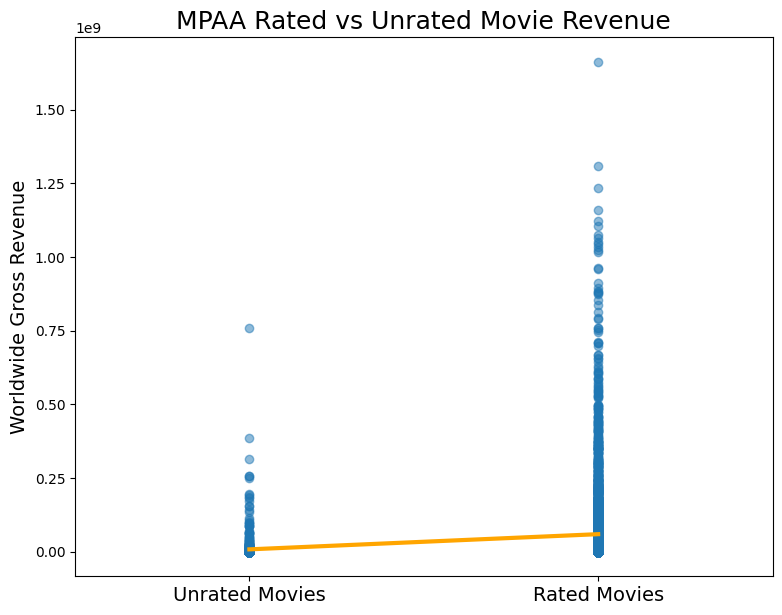

In [33]:
lr = LinearRegression()

x = -df2[['Unrated']]
y = df2['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))


ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

plt.title('MPAA Rated vs Unrated Movie Revenue', fontsize=18)
plt.ylabel('Worldwide Gross Revenue', fontsize=14)
plt.xlim([-1.5, 0.5])
plt.xticks(np.arange(-1, 0.5, 1))
labels = ['Unrated Movies','Rated Movies']
ax.set_xticklabels(labels, fontsize=14)


print(lr.score(x, y))



plt.savefig("MPAA_rating_revenue.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)



In [34]:
lr.coef_, lr.intercept_
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')
# The average Worldwide Gross is $51million higher for movies that have an MPAA rating

slope: 51560644.23
y-intercept: 59777843.73


## Average Worldwide Gross vs Audience Rating
- Tomatometer vs audience score in predicting movie success
- Hypothesis: Higher rated movies (by both critics and audience) will correlate with more success at the box office 

0.017372400634212748


/usr/local/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


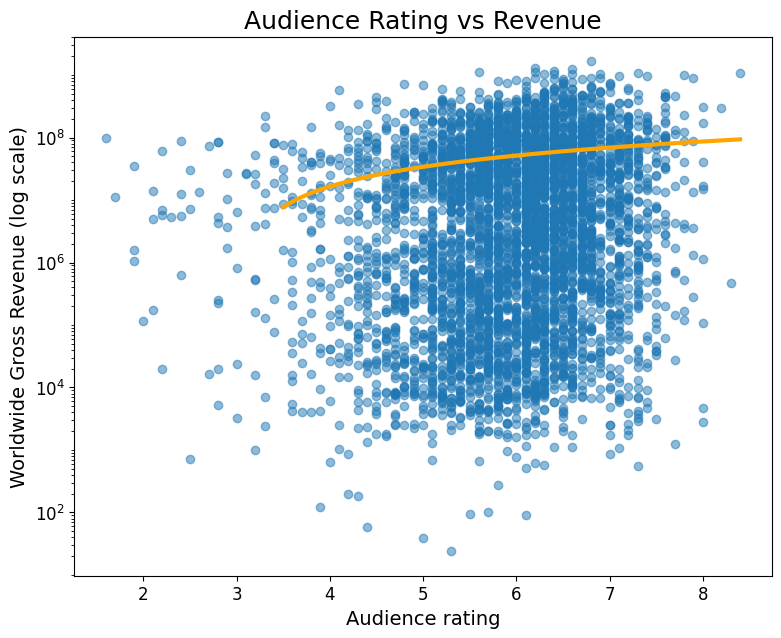

In [35]:
# AUDIENCE RATING

lr = LinearRegression()

x = df2[['Average_Audience_Rating']]
y = df2['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))


ax.scatter(x, y, alpha=.5)

_x = np.linspace(3.5, x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

ax.set_yscale('log')
y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
ax.yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.title('Audience Rating vs Revenue', fontsize=18)
plt.ylabel('Worldwide Gross Revenue (log scale)', fontsize=14)
plt.xlabel('Audience rating', fontsize=14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

print(lr.score(x, y))


plt.savefig("audience_rating.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)

In [36]:
lr.coef_, lr.intercept_
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')


slope: 17486441.96
y-intercept: -53508880.75


0.0022657499769072054


/usr/local/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


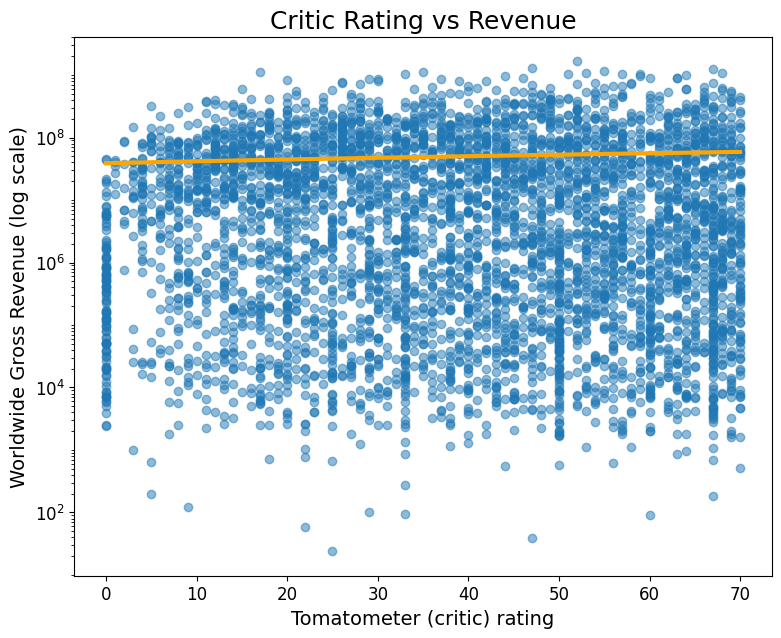

In [37]:
# CRITICS RATING

lr = LinearRegression()

x = df2[['Tomatometer']]
y = df2['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))


ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

ax.set_yscale('log')
y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
ax.yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.title('Critic Rating vs Revenue', fontsize=18)
plt.ylabel('Worldwide Gross Revenue (log scale)', fontsize=14)
plt.xlabel('Tomatometer (critic) rating', fontsize=14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

print(lr.score(x, y))

plt.savefig("critic_rating.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)


In [38]:
lr.coef_, lr.intercept_
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')


slope: 286838.63
y-intercept: 38778532.79


/usr/local/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.3862974236147205


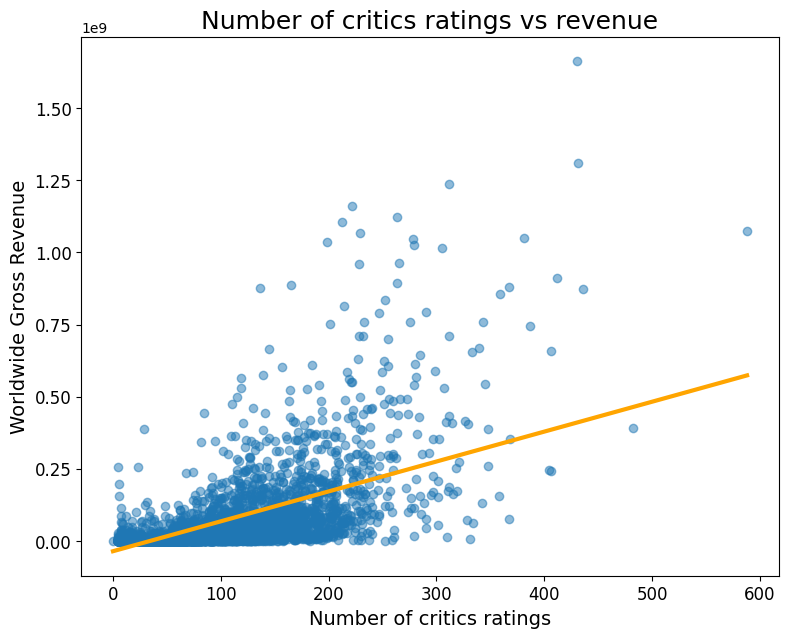

In [39]:
lr = LinearRegression()

x = df2[['N_Tomatometer']]
y = df2['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))

ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

plt.title('Number of critics ratings vs revenue', fontsize=18)
plt.ylabel('Worldwide Gross Revenue', fontsize=14)
plt.xlabel('Number of critics ratings', fontsize=14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)


plt.savefig("N_critic_rating.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)

print(lr.score(x, y))


In [40]:
lr.coef_, lr.intercept_
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')


slope: 1036550.07
y-intercept: -35496902.90


0.5572648999785235


/usr/local/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


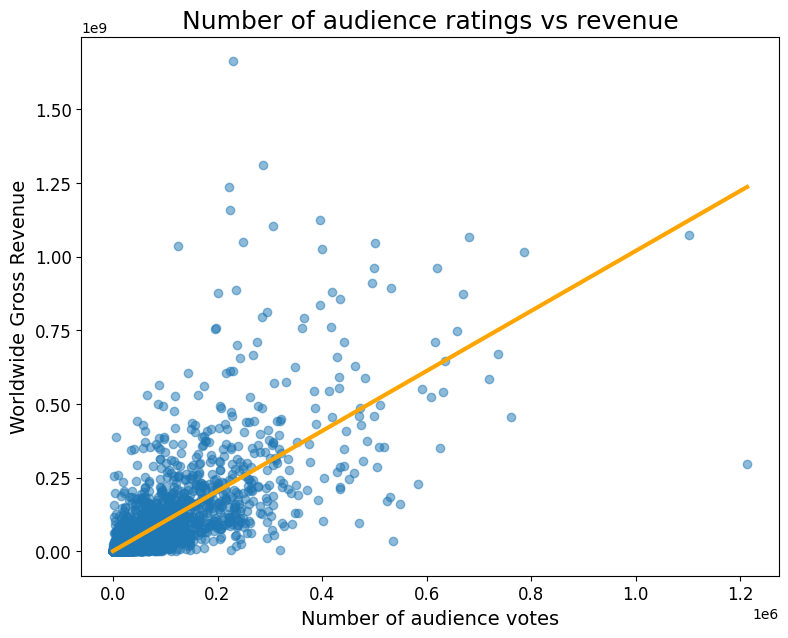

In [41]:
lr = LinearRegression()

x = df2[['Number_Audience_Votes']]
y = df2['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))


ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

plt.title('Number of audience ratings vs revenue',fontsize= 18)
plt.ylabel('Worldwide Gross Revenue',fontsize= 14)
plt.xlabel('Number of audience votes',fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)


print(lr.score(x, y))


plt.savefig("N_audience_rating.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)

In [42]:
lr.coef_, lr.intercept_
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')


slope: 1018.62
y-intercept: 527721.74


## RUN time correlation with box office success
HYPOTHESIS: there is little correlation between movie length and its success at the box office

0.07572157518341016


/usr/local/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


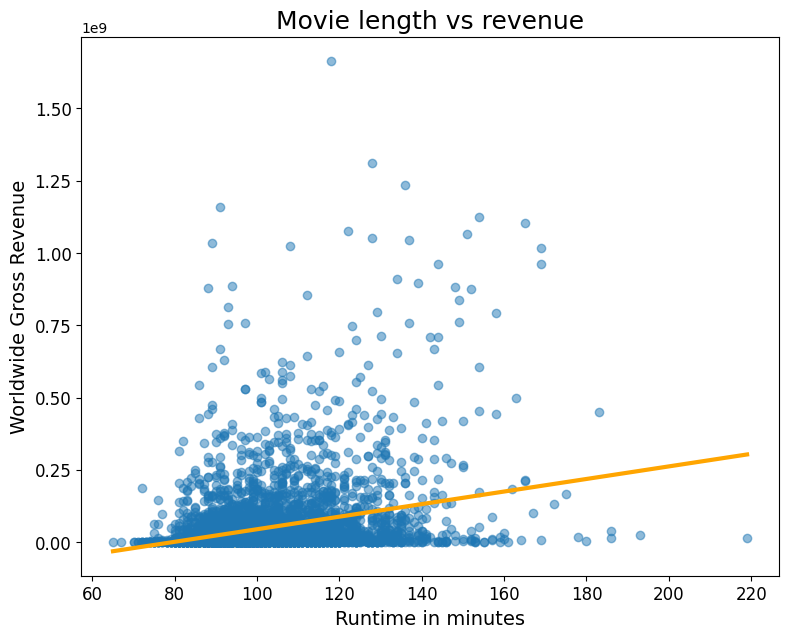

In [43]:
# quickly drop the single runtime row with NAN
df3 = df2[df2['runtimeMinutes'].notna()]

lr = LinearRegression()

x = df3[['runtimeMinutes']]
y = df3['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))

ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

plt.title('Movie length vs revenue',fontsize= 18)
plt.ylabel('Worldwide Gross Revenue',fontsize= 14)
plt.xlabel('Runtime in minutes',fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

print(lr.score(x, y))
plt.savefig("runtime_revenue.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


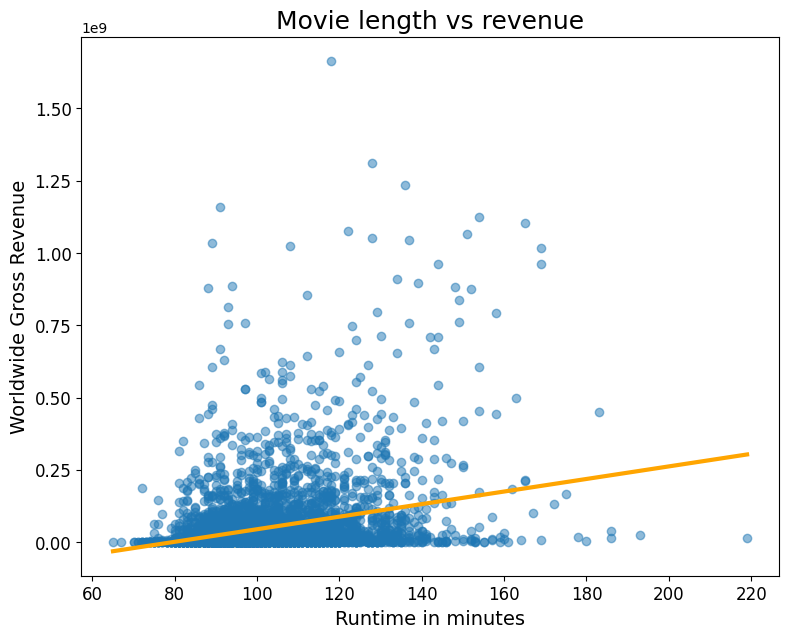

In [44]:
# quickly drop the single runtime row with NAN
df3 = df2[df2['runtimeMinutes'].notna()]

lr = LinearRegression()

x = df3[['runtimeMinutes']]
y = df3['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))

ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

plt.title('Movie length vs revenue',fontsize= 18)
plt.ylabel('Worldwide Gross Revenue',fontsize= 14)
plt.xlabel('Runtime in minutes',fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

print
plt.savefig("runtime_revenue.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)

In [45]:
lr.coef_, lr.intercept_
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')

slope: 2172733.13
y-intercept: -172713176.22


## Regularization - multiple feature linear regression analysis

In [46]:
# Dataframe for multivariable analysis
df3 = df2.loc[:,['Tomatometer', 'Year', 'N_Tomatometer', 'runtimeMinutes', 
                      'Average_Audience_Rating', 'Number_Audience_Votes', 
                      'Worldwide_Gross', 'Domestic_Opening', 'Unrated', 'Top_5_Genres']]

df3['Domestic_Opening'] = df3['Domestic_Opening'].replace(np.nan,df3['Domestic_Opening'].median())
df3['runtimeMinutes'] = df3['runtimeMinutes'].replace(np.nan,df3['runtimeMinutes'].median())

# Separate feature from target
X = df3.loc[:,['Tomatometer', 'Year', 'N_Tomatometer', 'runtimeMinutes', 
                      'Average_Audience_Rating', 'Number_Audience_Votes', 
                      'Domestic_Opening', 'Unrated', 'Top_5_Genres']]

y = df3.loc[:,['Worldwide_Gross']]

# Replace the missing values for Domestic Opening with its median value


df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4580 entries, 33 to 411
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tomatometer              4580 non-null   int64  
 1   Year                     4580 non-null   int64  
 2   N_Tomatometer            4580 non-null   int64  
 3   runtimeMinutes           4580 non-null   float64
 4   Average_Audience_Rating  4580 non-null   float64
 5   Number_Audience_Votes    4580 non-null   int64  
 6   Worldwide_Gross          4580 non-null   float64
 7   Domestic_Opening         4580 non-null   float64
 8   Unrated                  4580 non-null   int64  
 9   Top_5_Genres             4580 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 393.6 KB


### Fit a Lasso Regression

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
## .fit finds the mean and standard deviation of each variable in the training set
std = StandardScaler()
std.fit(X_train.values)
## apply the scaler to the train set
X_tr = std.transform(X_train.values)
## Apply the scaler to the test set
X_te = std.transform(X_test.values)
lasso = Lasso(alpha = 10000)
lasso.fit(X_tr, y_train)
test_r_squared = lasso.score(X_te, y_test)
print(test_r_squared)
print(list(zip(X_train.columns, lasso.coef_)))
variables_dropped_count = 5

0.8516989443546863
[('Tomatometer', 1432391.7294679296), ('Year', 5161342.274998509), ('N_Tomatometer', 78963.79219092084), ('runtimeMinutes', 2814237.9461898603), ('Average_Audience_Rating', 1664779.9632554548), ('Number_Audience_Votes', 18008409.339849003), ('Domestic_Opening', 92701463.14272103), ('Unrated', 2241409.8082256555), ('Top_5_Genres', 1106687.8472407255)]


In [48]:
# Use cross validation to find the optimal lambda
alphas = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphas, cv=5)
lasso_model.fit(X_tr, y_train)
r_squared_train = lasso_model.score(X_tr, y_train)
r_squared_test = lasso_model.score(X_te, y_test)
alpha = lasso_model.alpha_

print(r_squared_train)
print(r_squared_test)
print(alpha)


0.8332528316550576
0.8517145571741178
100.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Fit an ElasticNet Regression

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Use fit to find the mean and standard deviation of each variable in the training set
std = StandardScaler()
std.fit(X_train.values)

# Apply the scaler to the train set
X_tr = std.transform(X_train.values)

# Apply the scaler to the test set
X_te = std.transform(X_test.values)

enet = ElasticNet(alpha = 1, l1_ratio=.5)
enet.fit(X_tr, y_train)
test_r_squared = enet.score(X_te, y_test)

print(test_r_squared)
print(list(zip(X_train.columns, enet.coef_)))

enet = ElasticNet(alpha = 10000, l1_ratio=1)
enet.fit(X_tr, y_train)

list(zip(X_train.columns, enet.coef_))

variables_dropped_count = 5

0.7668862141806738
[('Tomatometer', -293299.27326428937), ('Year', 3542483.6379300943), ('N_Tomatometer', 13844947.69541261), ('runtimeMinutes', 3686288.199194253), ('Average_Audience_Rating', -381037.31166927743), ('Number_Audience_Votes', 26288007.541837066), ('Domestic_Opening', 51607661.30830691), ('Unrated', 945657.9293973312), ('Top_5_Genres', 330971.4573828842)]


In [50]:
# Find an optimal l1_ratio and alpha value for Elastic Net regression models 

alphas = 10 ** np.linspace(-2, 2, 200)

enet_model = ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], 
                          alphas = alphas, 
                          cv=5,
                          random_state=42)

enet_model.fit(X_tr, y_train)

r_squared_train = enet_model.score(X_tr, y_train)
r_squared_test = enet_model.score(X_te, y_test)
alpha = enet_model.alpha_
l1_ratio = enet_model.l1_ratio_

print("r_squared_train: ", round(r_squared_train, 3))
print("r_squared_test: ", round(r_squared_test, 3))
print("alpha: ", round(alpha, 3))
print("l1_ratio: ", l1_ratio)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r_squared_train:  0.833
r_squared_test:  0.852
alpha:  100.0
l1_ratio:  1.0


## Feature Selection for Multiple Regression

In [51]:
x = df3.loc[:,['Tomatometer', 'Year', 'N_Tomatometer', 'runtimeMinutes', 
                      'Average_Audience_Rating', 'Number_Audience_Votes', 
                      'Domestic_Opening', 'Unrated', 'Top_5_Genres']]
x = sm.add_constant(x)
y = df3.loc[:,['Worldwide_Gross']]

model = sm.OLS(y,x, data = df3)

revenue_model = model.fit()
revenue_model.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Worldwide_Gross   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     2614.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:16:16   Log-Likelihood:                -87494.
No. Observations:                4580   AIC:                         1.750e+05
Df Residuals:                    4570   BIC:                         1.751e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.107e+09   2.73e+08     -7.726      0.000   -2.64e+09   -1.57e+09
Tomatometer              6.874e+04   4.49e+04      1.533      0.125   -1.92e+04    1.57e+05
Year                     1.022e+06   1.35e+05      7.550      0.000    7.57e+05    1.29e+06
N_Tomatometer             495.3461   1.58e+04      0.031      0.975   -3.04e+04    3.14e+04
runtimeMinutes           2.189e+05   5.35e+04      4.094      0.000    1.14e+05    3.24e+05
Average_Audience_Rating  2.124e+06   1.04e+06      2.033      0.042    7.58e+04    4.17e+06
Number_Audience_Votes     195.9089     13.947     14.046      0.000     168.565     223.252
Domestic_Opening            6.6582      0.080     83.010      0.000       6.501       6.815
Unrated                  6.134e+06   2.06e+06      2.977      0.003    2.09e+06    1.02e+07
Top_5_Genres               5.8e+06   3.25e+06      1.784      0.074   -5.73e+05    1.22e+07
==============================================================================
Omnibus:                     3484.068   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216107.342
Skew:                           3.079   Prob(JB):                         0.00
Kurtosis:                      36.084   Cond. No.                     6.13e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# Drop the variable(s) that have a p-value of greater than 0.05 (which means they are not significant) 
# and fit a regression on the remaining variables.
x = df3.drop(columns = ['Tomatometer', 'N_Tomatometer', 'Top_5_Genres','Worldwide_Gross'])
x = sm.add_constant(x)
y = df3.loc[:,['Worldwide_Gross']]
model = sm.OLS(y,x, data = df3)

revenue_model2 = model.fit()
revenue_model2.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Worldwide_Gross   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3919.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:16:16   Log-Likelihood:                -87497.
No. Observations:                4580   AIC:                         1.750e+05
Df Residuals:                    4573   BIC:                         1.751e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.133e+09   2.71e+08     -7.864      0.000   -2.66e+09    -1.6e+09
Year                     1.037e+06   1.35e+05      7.693      0.000    7.72e+05     1.3e+06
runtimeMinutes           2.317e+05   5.17e+04      4.477      0.000     1.3e+05    3.33e+05
Average_Audience_Rating  2.807e+06   8.78e+05      3.199      0.001    1.09e+06    4.53e+06
Number_Audience_Votes     197.2809     13.199     14.947      0.000     171.405     223.156
Domestic_Opening            6.6529      0.077     86.816      0.000       6.503       6.803
Unrated                  6.025e+06   1.88e+06      3.198      0.001    2.33e+06    9.72e+06
==============================================================================
Omnibus:                     3486.675   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216545.149
Skew:                           3.082   Prob(JB):                         0.00
Kurtosis:                      36.117   Cond. No.                     6.10e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ANALYSIS
- The p-values of the features remain below 0.05, so this new model (after dropping 'Tomatometer', 'N_Tomatometer', 'Top_5_Genres' columns) is better because it is less complex
- Dropping the 3 columns had no effect on the R-squared or adjusted R-squared values
- There still may be a problem with multicollinearity as flagged by the high condition number

## REGRESSION + FEATURE ENGINEERING

In [53]:
# Split into train, val, and test
X, X_test, y, y_test = train_test_split(df3.loc[:,['Tomatometer', 'Year', 'N_Tomatometer', 'runtimeMinutes', 
                      'Average_Audience_Rating', 'Number_Audience_Votes', 
                      'Domestic_Opening', 'Unrated', 'Top_5_Genres']], 
                                        df3.loc[:,['Worldwide_Gross']], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [54]:
# Fit a simple linear regression on training set
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.8438165311007608

In [55]:
# score on the validation set
lr.score(X_val,y_val)

0.8195373221549626

In [56]:
# Validation score is lower than training score, so there's some overfitting. 
# Try polynomial regression to see if it can do better.

In [57]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.8738433509725563

In [58]:
# Score on validation set
lr_poly.score(X_val_poly, y_val) 

0.7872645912625174